# __Codename: Plutus IO__

##### __Functional TODOs__:

1. Create generic "adapter" functions to adapt individual configs for certain behaviour
2. Add land
3. Add "tax account"
4. Add concept of a family

In [1]:
# libs
import sys, logging, json, datetime
sys.path.append("/home/rado/Projects/wealthManagement/plutus/")

from context.instruments import CurrentAccount, Mortgage
from context.assets import RealEstate
from context.agreements import RentalAgreement, UtilitiesAgreement, EmployeeContract
from context.party import Party, Portfolio
from context.behaviour import transfer
from context.market import extrapolate_index
from core.helpers import configure_run

# delete log
import os
if os.path.exists("plutus.log"): os.remove("plutus.log")

## Setup

In [2]:
# load configmap
with open('_configmap.json') as f: configmap = json.load(f)

# configure run
run_config, market, portfolio, event_config, logger = configure_run(configmap)

#### [5] Parties

In [3]:
rado = Party(id='Rado'
             , logger=logger 
             , initial_free_cash=0
             , initial_portfolio=Portfolio(logger, elements = portfolio)
             , monthly_expenditures=30000
             , discount_rate=0.015
             , events=event_config
             , market=market
             , birthdate=datetime.date(1988,5,4)
             , today=datetime.date(2021,4,4)
             , retirement_age=66)

## __Simulation__

In [4]:
logger.info('')
logger.info('============================================')
logger.info('============== SIMULATION  =================')
logger.info('============================================')
logger.info('')

In [5]:
rado.live(run_config['n_years']*12+1)

### Plots

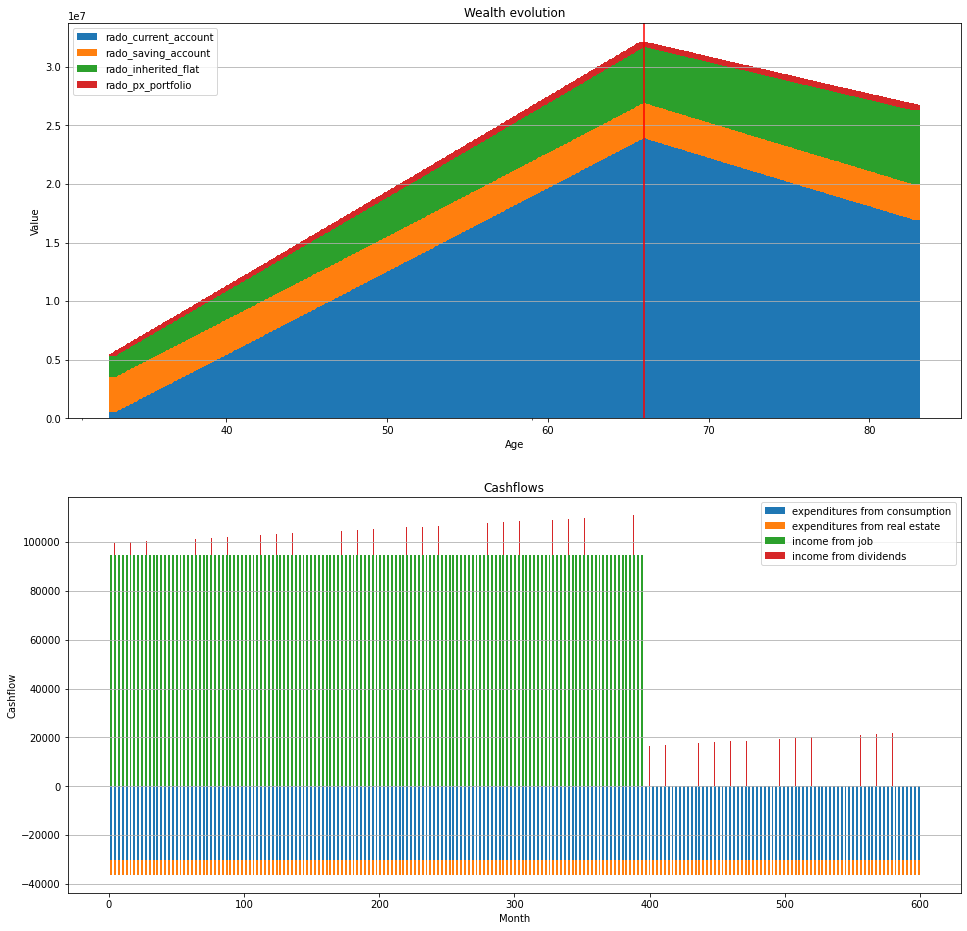

In [6]:
# plots
from core.plots import PartyPlotter

plt = PartyPlotter(rado)
#plt.plot_position_evolution()
plt.plot_wealth_evolution()